In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cause = pd.read_csv('injury-australia-gender-agewise-grouped-2012-2017.csv')
cause.drop('Unnamed: 0',axis=1,inplace=True)

In [3]:
#Predefined Function to calculate the ticks and its name for various Axis's
#Based on the min and max values of the array given
def findAxisCordinatesAndNamesForTicks(Values = [],formatValue = 1,divisions = 20,overallMin = -1,overallMax=-1):
    if(overallMin == -1):
        overallMin = Values.agg('min')
    if(overallMax == -1):
        overallMax = Values.agg('max')
    #Finding the y axis label
    axis = []
    axisVariableNames = []
    i = int(overallMin)
    diff = (overallMax - overallMin)/divisions
    if(diff > (int(diff)+ 0.5)):
        diff = int(diff + 1)
    elif(diff > 1):
        diff = int(diff)
    diff = round(diff,2)
    while(i < overallMax + diff):
        i = round(i,2)
        axis.append(i)
        if(formatValue != 1):
            axisVariableNames.append(str(i/formatValue))
        else : 
            axisVariableNames.append(str(i))
        i += diff
    return [axis,axisVariableNames]

In [4]:
cause = cause[ cause['Gender'] !='Person']

In [5]:
cause.head(15)

,year,Gender,0–4,5–9,10-24,25-44,45-64,65+,Total
0,2007–08,Male,131,22,53,68,30,13,317
1,2008–09,Male,121,25,56,59,37,25,323
2,2009–10,Male,130,21,70,63,44,30,358
3,2010–11,Male,119,15,53,60,46,18,311
4,2011–12,Male,107,21,65,55,27,26,301
5,2012–13,Male,122,42,62,77,35,24,362
6,2013–14,Male,118,32,60,76,44,34,364
7,2014–15,Male,127,38,78,77,42,24,386
8,2015–16,Male,139,34,82,78,48,29,410
9,2016–17,Male,132,28,83,69,45,28,385


In [6]:
cause = pd.melt(cause ,id_vars=['Gender','year','Total'],var_name='AgeGroup')
cause.rename(columns = {'value':'Injuries'}, inplace = True)

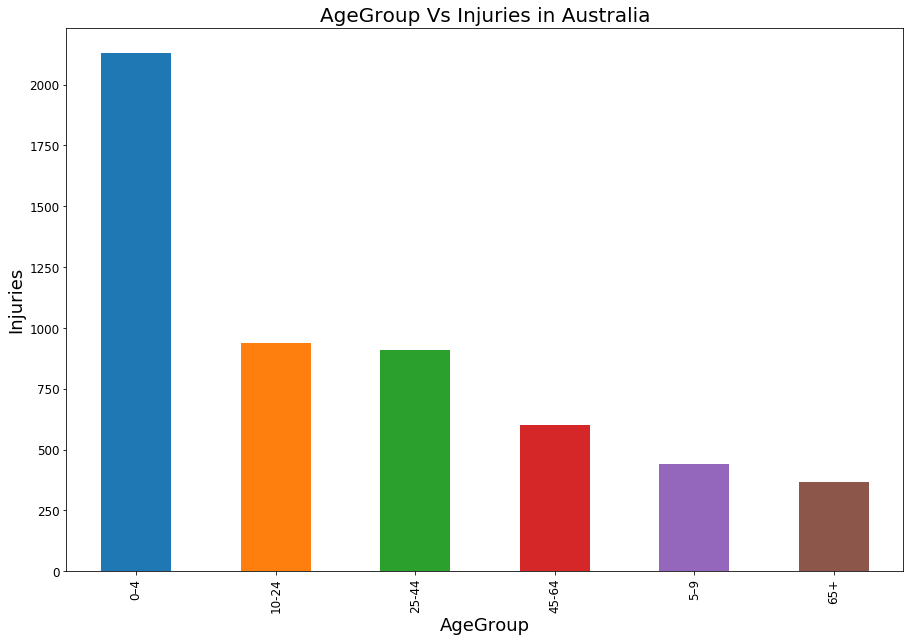

In [7]:
causeGrouped = cause.groupby(['AgeGroup'])['Injuries'].agg('sum').reset_index()
causeGrouped = causeGrouped.sort_values(by=['Injuries'],ascending =False)
causeGrouped.plot.bar(x='AgeGroup',y='Injuries',figsize=(15, 10),fontsize=12,legend=None)
plt.ylabel('Injuries',fontsize=18)
plt.xlabel('AgeGroup',fontsize=18)
plt.title('AgeGroup Vs Injuries in Australia',fontsize=20)
plt.show()

In [8]:
cause2017 = cause[cause['year'] == '2016–17']

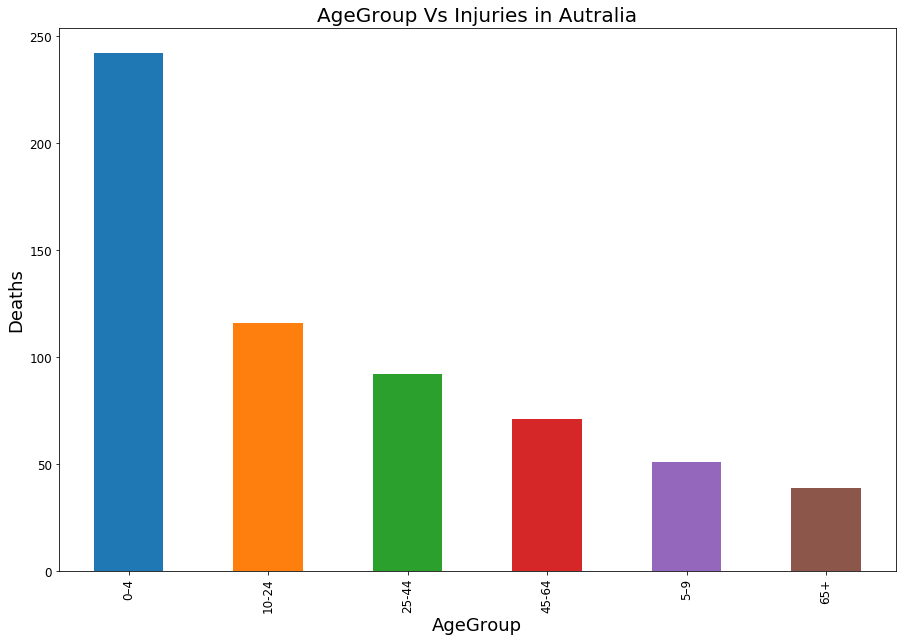

In [9]:
causeGrouped = cause2017.groupby(['AgeGroup'])['Injuries'].agg('sum').reset_index()
causeGrouped = causeGrouped.sort_values(by=['Injuries'],ascending =False)
causeGrouped.plot.bar(x='AgeGroup',y='Injuries',figsize=(15, 10),fontsize=12,legend=None)
plt.ylabel('Deaths',fontsize=18)
plt.xlabel('AgeGroup',fontsize=18)
plt.title('AgeGroup Vs Injuries in Autralia',fontsize=20)
plt.show()

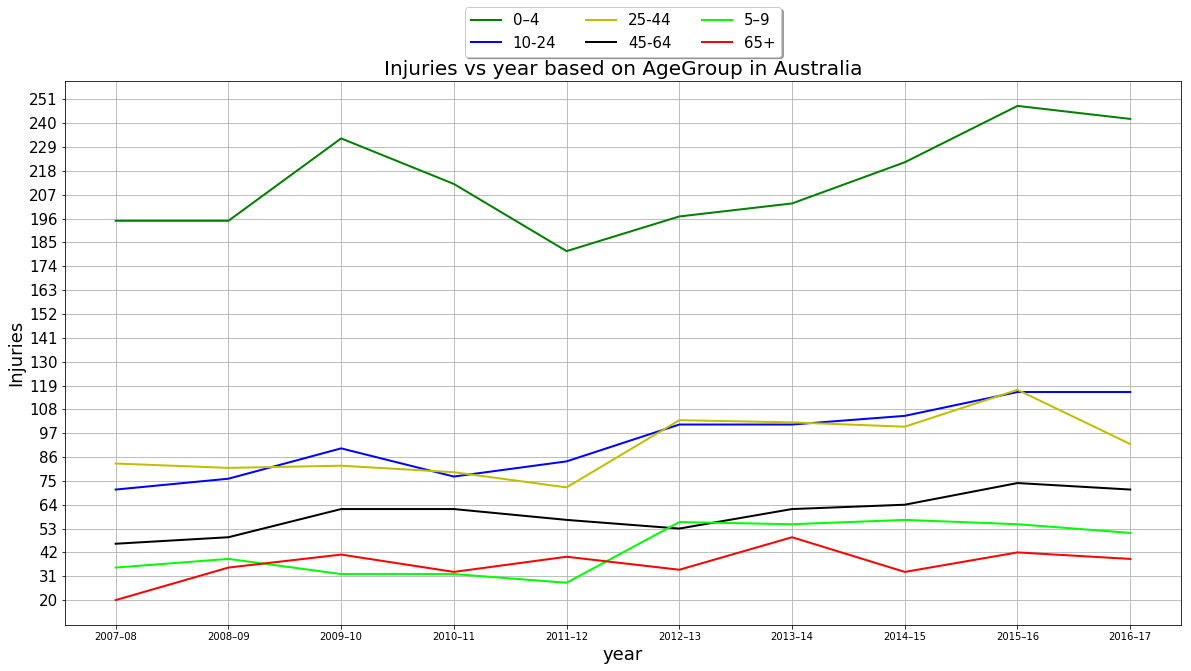

In [10]:
temp = cause[['AgeGroup','year','Injuries']].groupby(['AgeGroup','year']).agg('sum').reset_index()
groupedInfo = temp.groupby('AgeGroup')

yAxis, yAxisVariableNames = findAxisCordinatesAndNamesForTicks(temp['Injuries'])
colors = ['r','g','b','y','k','lime']

#Finding the x axis label
#ticks = findAxisCordinatesAndNamesForTicks(cause['year'],divisions = 10)
#xAxis = ticks[0]
#xAxisVariableNames =ticks[1]  

plt.figure(figsize = (20,10))

i=0
for ageGroup,info in groupedInfo:
    i+=1
    plt.plot(info.year,info.Injuries, label = ageGroup, linewidth = 2.0,color=colors[i%6])

#plt.xticks(xAxis, xAxisVariableNames, rotation = 45, fontsize = 15)
plt.yticks(yAxis, yAxisVariableNames, fontsize = 15)

plt.ylabel('Injuries', fontsize=18)
plt.xlabel('year', fontsize=18)
plt.title('Injuries vs year based on AgeGroup in Australia', fontsize=20)
plt.legend(loc= 'upper center', ncol=3, fancybox = True, shadow = True, bbox_to_anchor = (0.5, 1.15), fontsize = 15)

plt.grid()
plt.show()

### Increase in %

In [11]:
cause['AgeGroup'].unique()

array(['0–4', '5–9', '10-24', '25-44', '45-64', '65+'], dtype=object)

In [12]:
Injuries2007 = cause[(cause['year'] == '2007–08') & (cause['AgeGroup'] =='5–9')]['Injuries'].agg('sum')
InjuriesAvg = (cause[(cause['AgeGroup'] =='5–9')]['Injuries'].agg('sum'))/10
Injuries2017 = cause[(cause['year'] == '2016–17') & (cause['AgeGroup'] =='5–9')]['Injuries'].agg('sum')
BaseIncrease = (Injuries2017 - Injuries2007)*100/Injuries2007
AvgIncrease = (Injuries2017 - InjuriesAvg)*100/InjuriesAvg
print("There is a",round(BaseIncrease,2),"% increase from base value and",round(AvgIncrease,2),"% increase from 10 year average")

There is a 45.71 % increase from base value and 15.91 % increase from 10 year average


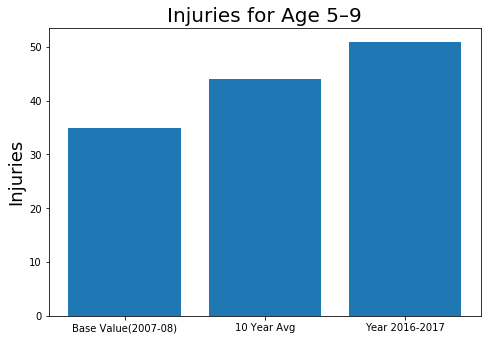

In [13]:
Injuries = [Injuries2007,InjuriesAvg,Injuries2017]
InjuriesColName = ['Base Value(2007-08)','10 Year Avg','Year 2016-2017']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(InjuriesColName,Injuries)
plt.ylabel('Injuries',fontsize=18)
plt.title('Injuries for Age 5–9',fontsize=20)
plt.show()

## Cases in Victoria

In [14]:
causeVic = pd.read_csv('injury-vic-gender-agewise-grouped-2016-2017.csv')
causeVic.drop('Unnamed: 0',axis=1,inplace=True)

In [15]:
causeVic.columns

Index(['Cause', 'Gender', '0–4', '5–9', '10-24', '25-44', '45-64', '65+',
       'Total'],
      dtype='object')

In [16]:
causeVic = pd.melt(causeVic ,id_vars=['Cause','Gender','Total'],var_name='AgeGroup')
causeVic.rename(columns = {'value':'Injuries'}, inplace = True)

In [17]:
causeVic.head()

,Cause,Gender,Total,AgeGroup,Injuries
0,accidental drowning and submersion,Male,62,0–4,9
1,accidental drowning and submersion,Female,25,0–4,8
2,accidental drowning and submersion,Person,87,0–4,17
3,accidental drowning and submersion,Male,62,5–9,6
4,accidental drowning and submersion,Female,25,5–9,4


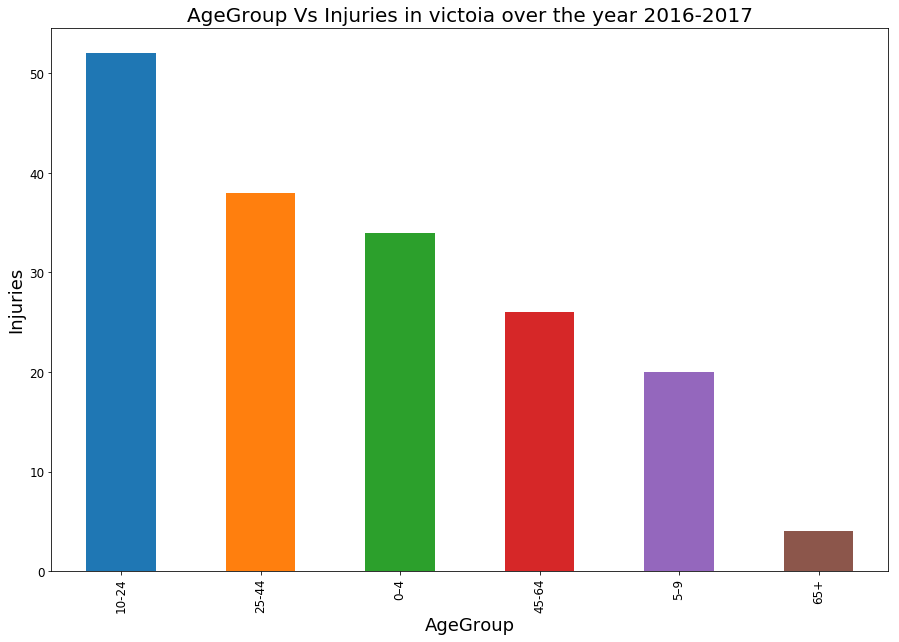

In [18]:
causeVicGrouped = causeVic.groupby(['AgeGroup'])['Injuries'].agg('sum').reset_index()
causeVicGrouped = causeVicGrouped.sort_values(by=['Injuries'],ascending =False)
causeVicGrouped.plot.bar(x='AgeGroup',y='Injuries',figsize=(15, 10),fontsize=12,legend=None)
plt.ylabel('Injuries',fontsize=18)
plt.xlabel('AgeGroup',fontsize=18)
plt.title('AgeGroup Vs Injuries in victoia over the year 2016-2017',fontsize=20)
plt.show()

## Age Group Based on Location

In [19]:
causeLoc = pd.read_csv('injury-australia-location-agewise-grouped-2012-2017.csv')
causeLoc.drop('Unnamed: 0',axis=1,inplace=True)
causeLoc.head()

,year,Location,0–4,5–9,10-24,25-44,45-64,65+,Total
0,2012–13,Major cities,111,37,53,72,35,17,325
1,2013–14,Major cities,131,29,63,59,35,30,347
2,2014–15,Major cities,145,39,64,67,43,23,381
3,2015–16,Major cities,141,32,84,73,44,28,402
4,2016–17,Major cities,150,34,78,57,41,22,382


In [20]:
causeLoc.head(20)

,year,Location,0–4,5–9,10-24,25-44,45-64,65+,Total
0,2012–13,Major cities,111,37,53,72,35,17,325
1,2013–14,Major cities,131,29,63,59,35,30,347
2,2014–15,Major cities,145,39,64,67,43,23,381
3,2015–16,Major cities,141,32,84,73,44,28,402
4,2016–17,Major cities,150,34,78,57,41,22,382
5,2012–13,Inner regional,49,10,30,9,9,8,115
6,2013–14,Inner regional,43,10,20,15,14,4,106
7,2014–15,Inner regional,41,11,23,9,13,4,101
8,2015–16,Inner regional,48,8,18,17,11,5,107
9,2016–17,Inner regional,41,12,16,11,11,6,97


In [21]:
causeLoc = pd.melt(causeLoc ,id_vars=['Location','year','Total'],var_name='AgeGroup')
causeLoc.rename(columns = {'value':'Injuries'}, inplace = True)

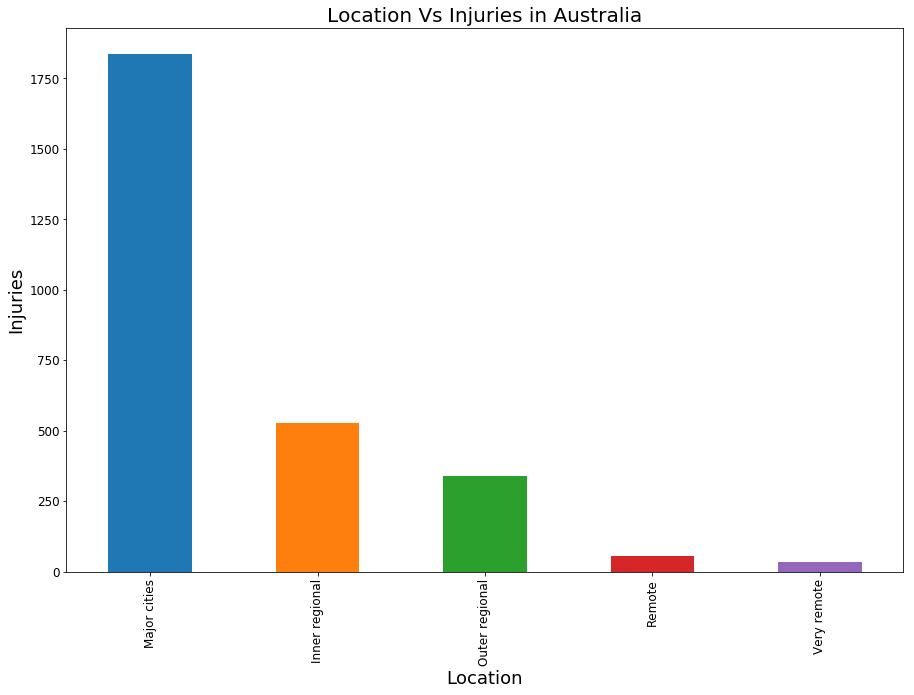

In [22]:
causeLocGrouped = causeLoc.groupby(['Location'])['Injuries'].agg('sum').reset_index()
causeLocGrouped = causeLocGrouped.sort_values(by=['Injuries'],ascending =False)
causeLocGrouped.plot.bar(x='Location',y='Injuries',figsize=(15, 10),fontsize=12,legend=None)
plt.ylabel('Injuries',fontsize=18)
plt.xlabel('Location',fontsize=18)
plt.title('Location Vs Injuries in Australia',fontsize=20)
plt.show()

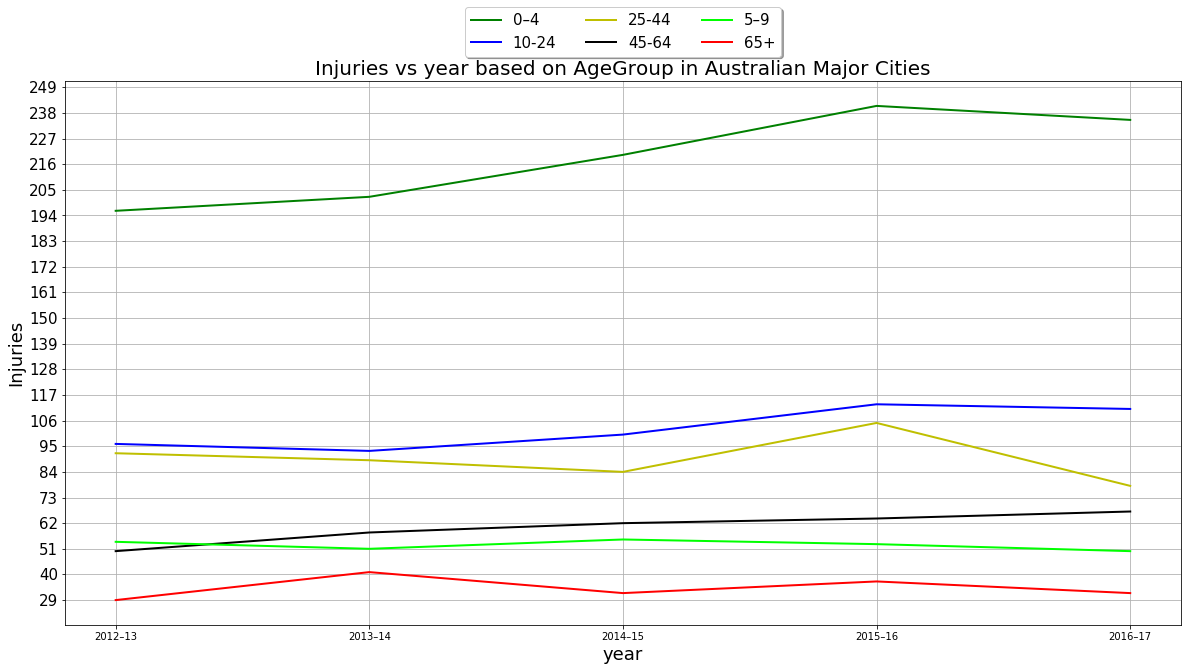

In [23]:
temp = causeLoc[['AgeGroup','year','Injuries']].groupby(['AgeGroup','year']).agg('sum').reset_index()
groupedInfo = temp.groupby('AgeGroup')

yAxis, yAxisVariableNames = findAxisCordinatesAndNamesForTicks(temp['Injuries'])
colors = ['r','g','b','y','k','lime']

#Finding the x axis label
#ticks = findAxisCordinatesAndNamesForTicks(cause['year'],divisions = 10)
#xAxis = ticks[0]
#xAxisVariableNames =ticks[1]  

plt.figure(figsize = (20,10))

i=0
for ageGroup,info in groupedInfo:
    i+=1
    plt.plot(info.year,info.Injuries, label = ageGroup, linewidth = 2.0,color=colors[i%6])

#plt.xticks(xAxis, xAxisVariableNames, rotation = 45, fontsize = 15)
plt.yticks(yAxis, yAxisVariableNames, fontsize = 15)

plt.ylabel('Injuries', fontsize=18)
plt.xlabel('year', fontsize=18)
plt.title('Injuries vs year based on AgeGroup in Australian Major Cities', fontsize=20)
plt.legend(loc= 'upper center', ncol=3, fancybox = True, shadow = True, bbox_to_anchor = (0.5, 1.15), fontsize = 15)

plt.grid()
plt.show()

In [24]:
causeLocMajor = causeLoc[causeLoc['Location'] == 'Major cities']
causeLocInnerRegion = causeLoc[causeLoc['Location'] == 'Inner regional']
causeLocOuterRegion = causeLoc[causeLoc['Location'] == 'Outer regional']
causeLocRemote = causeLoc[causeLoc['Location'] == 'Remote']
causeLocVeryRemote = causeLoc[causeLoc['Location'] == 'Very remote']

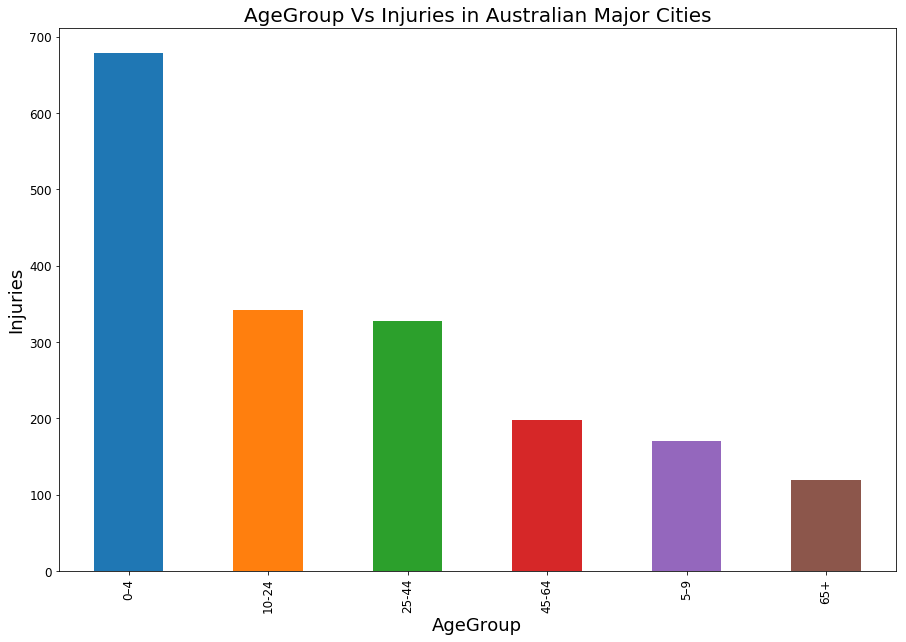

In [25]:
causeLocGrouped = causeLocMajor.groupby(['AgeGroup'])['Injuries'].agg('sum').reset_index()
causeLocGrouped = causeLocGrouped.sort_values(by=['Injuries'],ascending =False)
causeLocGrouped.plot.bar(x='AgeGroup',y='Injuries',figsize=(15, 10),fontsize=12,legend=None)
plt.ylabel('Injuries',fontsize=18)
plt.xlabel('AgeGroup',fontsize=18)
plt.title('AgeGroup Vs Injuries in Australian Major Cities',fontsize=20)
plt.show()

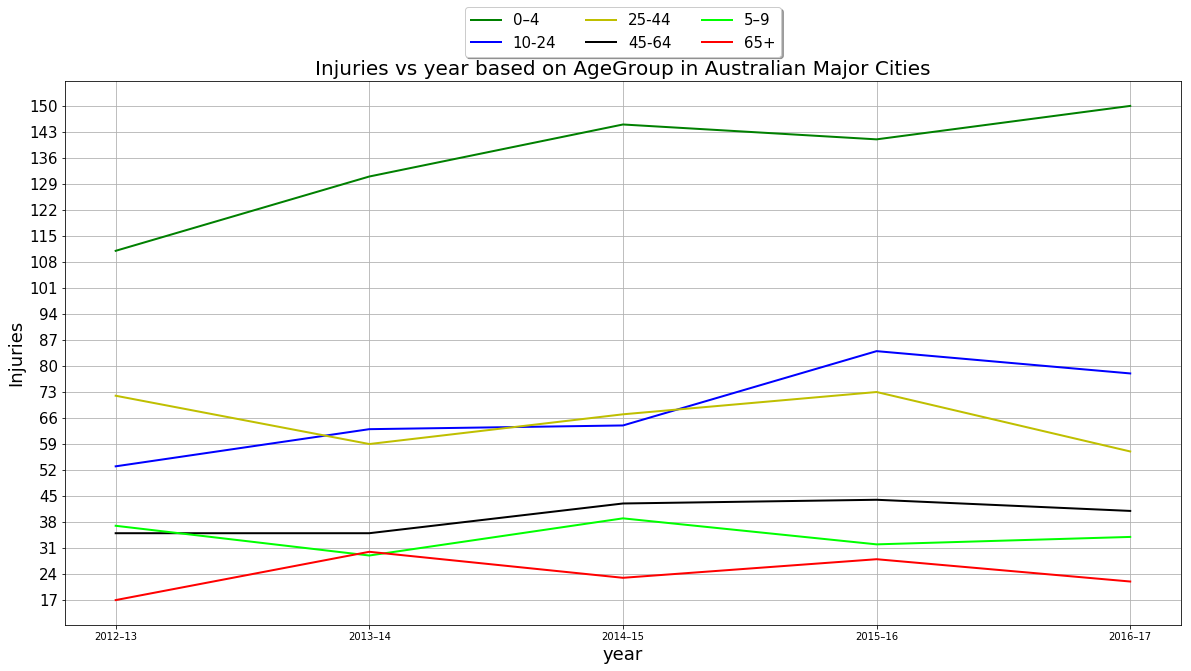

In [26]:
temp = causeLocMajor[['AgeGroup','year','Injuries']].groupby(['AgeGroup','year']).agg('sum').reset_index()
groupedInfo = temp.groupby('AgeGroup')

yAxis, yAxisVariableNames = findAxisCordinatesAndNamesForTicks(temp['Injuries'])
colors = ['r','g','b','y','k','lime']

#Finding the x axis label
#ticks = findAxisCordinatesAndNamesForTicks(cause['year'],divisions = 10)
#xAxis = ticks[0]
#xAxisVariableNames =ticks[1]  

plt.figure(figsize = (20,10))

i=0
for ageGroup,info in groupedInfo:
    i+=1
    plt.plot(info.year,info.Injuries, label = ageGroup, linewidth = 2.0,color=colors[i%6])

#plt.xticks(xAxis, xAxisVariableNames, rotation = 45, fontsize = 15)
plt.yticks(yAxis, yAxisVariableNames, fontsize = 15)

plt.ylabel('Injuries', fontsize=18)
plt.xlabel('year', fontsize=18)
plt.title('Injuries vs year based on AgeGroup in Australian Major Cities', fontsize=20)
plt.legend(loc= 'upper center', ncol=3, fancybox = True, shadow = True, bbox_to_anchor = (0.5, 1.15), fontsize = 15)

plt.grid()
plt.show()

There is a -8.11 % increase from base value and -0.58 % increase from 10 year average


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


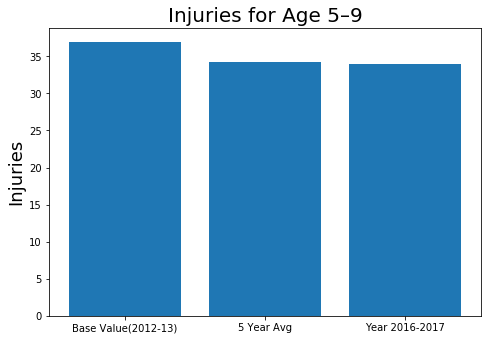

In [27]:
Injuries2012 = causeLocMajor[(causeLocMajor['year'] == '2012–13') & (cause['AgeGroup'] =='5–9')]['Injuries'].agg('sum')
InjuriesAvg = (causeLocMajor[(causeLocMajor['AgeGroup'] =='5–9')]['Injuries'].agg('sum'))/5
Injuries2017 = causeLocMajor[(causeLocMajor['year'] == '2016–17') & (cause['AgeGroup'] =='5–9')]['Injuries'].agg('sum')
BaseIncrease = (Injuries2017 - Injuries2012)*100/Injuries2012
AvgIncrease = (Injuries2017 - InjuriesAvg)*100/InjuriesAvg
print("There is a",round(BaseIncrease,2),"% increase from base value and",round(AvgIncrease,2),"% increase from 10 year average")

Injuries = [Injuries2012,InjuriesAvg,Injuries2017]
InjuriesColName = ['Base Value(2012-13)','5 Year Avg','Year 2016-2017']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(InjuriesColName,Injuries)
plt.ylabel('Injuries',fontsize=18)
plt.title('Injuries for Age 5–9',fontsize=20)
plt.show()

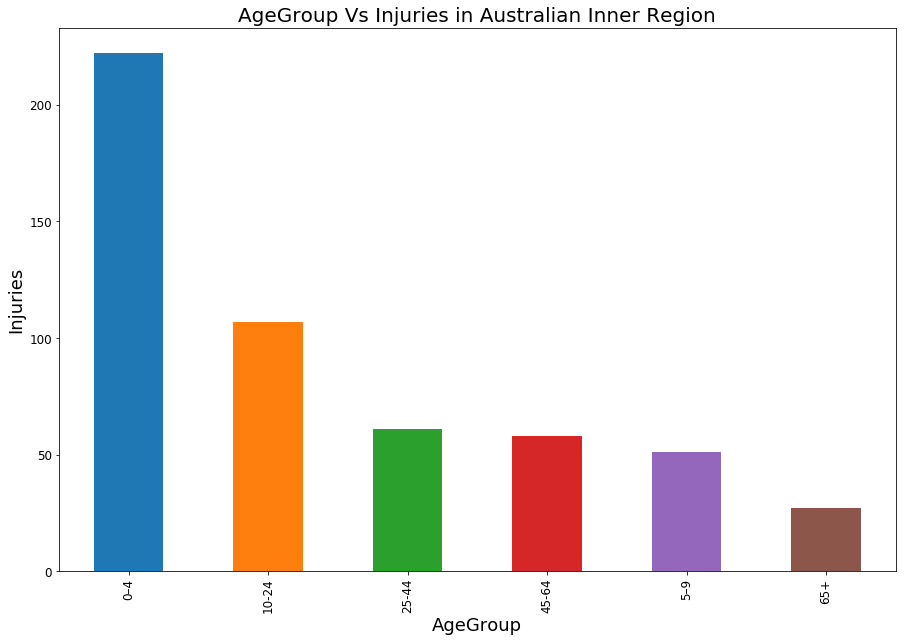

In [28]:
causeLocGrouped = causeLocInnerRegion.groupby(['AgeGroup'])['Injuries'].agg('sum').reset_index()
causeLocGrouped = causeLocGrouped.sort_values(by=['Injuries'],ascending =False)
causeLocGrouped.plot.bar(x='AgeGroup',y='Injuries',figsize=(15, 10),fontsize=12,legend=None)
plt.ylabel('Injuries',fontsize=18)
plt.xlabel('AgeGroup',fontsize=18)
plt.title('AgeGroup Vs Injuries in Australian Inner Region',fontsize=20)
plt.show()

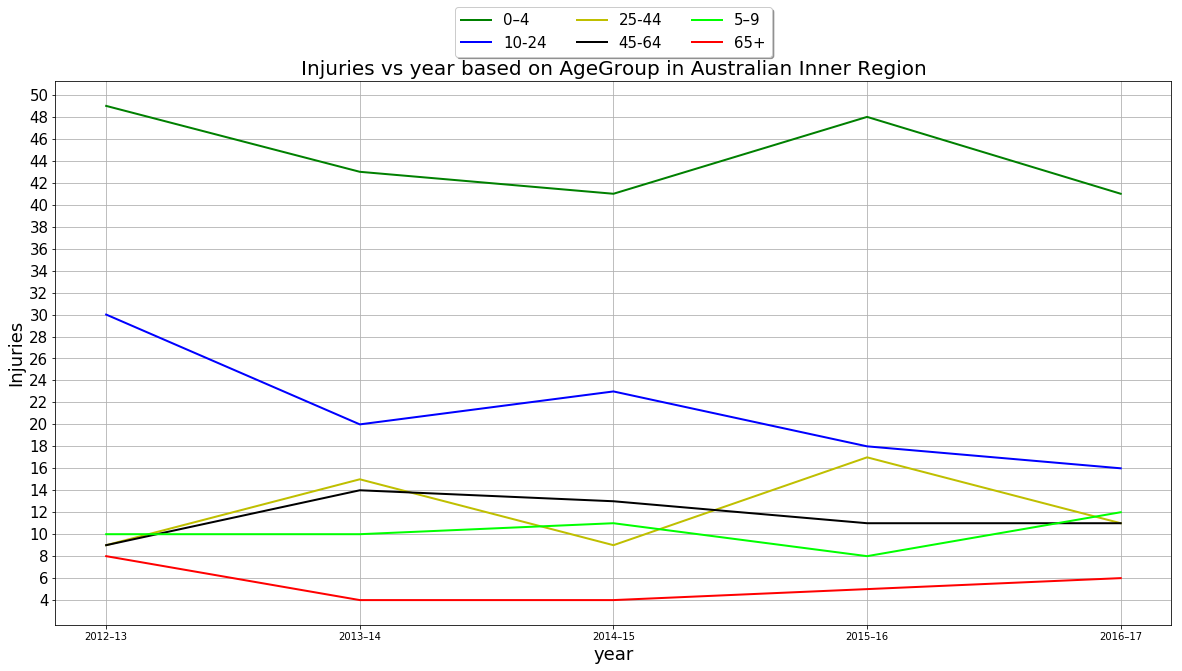

In [29]:
temp = causeLocInnerRegion[['AgeGroup','year','Injuries']].groupby(['AgeGroup','year']).agg('sum').reset_index()
groupedInfo = temp.groupby('AgeGroup')

yAxis, yAxisVariableNames = findAxisCordinatesAndNamesForTicks(temp['Injuries'])
colors = ['r','g','b','y','k','lime']

#Finding the x axis label
#ticks = findAxisCordinatesAndNamesForTicks(cause['year'],divisions = 10)
#xAxis = ticks[0]
#xAxisVariableNames =ticks[1]  

plt.figure(figsize = (20,10))

i=0
for ageGroup,info in groupedInfo:
    i+=1
    plt.plot(info.year,info.Injuries, label = ageGroup, linewidth = 2.0,color=colors[i%6])

#plt.xticks(xAxis, xAxisVariableNames, rotation = 45, fontsize = 15)
plt.yticks(yAxis, yAxisVariableNames, fontsize = 15)

plt.ylabel('Injuries', fontsize=18)
plt.xlabel('year', fontsize=18)
plt.title('Injuries vs year based on AgeGroup in Australian Inner Region', fontsize=20)
plt.legend(loc= 'upper center', ncol=3, fancybox = True, shadow = True, bbox_to_anchor = (0.5, 1.15), fontsize = 15)

plt.grid()
plt.show()

There is a 20.0 % increase from base value and 17.65 % increase from 5 year average


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


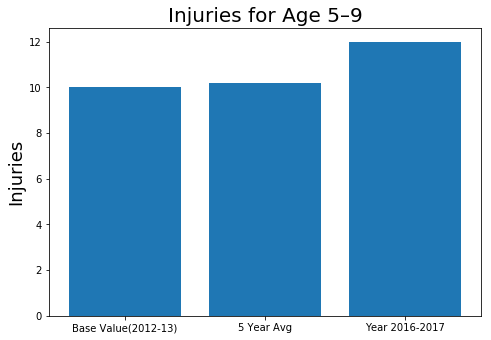

In [40]:
Injuries2012 = causeLocInnerRegion[(causeLocInnerRegion['year'] == '2012–13') & (cause['AgeGroup'] =='5–9')]['Injuries'].agg('sum')
InjuriesAvg = (causeLocInnerRegion[(causeLocInnerRegion['AgeGroup'] =='5–9')]['Injuries'].agg('sum'))/5
Injuries2017 = causeLocInnerRegion[(causeLocInnerRegion['year'] == '2016–17') & (cause['AgeGroup'] =='5–9')]['Injuries'].agg('sum')
BaseIncrease = (Injuries2017 - Injuries2012)*100/Injuries2012
AvgIncrease = (Injuries2017 - InjuriesAvg)*100/InjuriesAvg
print("There is a",round(BaseIncrease,2),"% increase from base value and",round(AvgIncrease,2),"% increase from 5 year average")

Injuries = [Injuries2012,InjuriesAvg,Injuries2017]
InjuriesColName = ['Base Value(2012-13)','5 Year Avg','Year 2016-2017']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(InjuriesColName,Injuries)
plt.ylabel('Injuries',fontsize=18)
plt.title('Injuries for Age 5–9',fontsize=20)
plt.show()

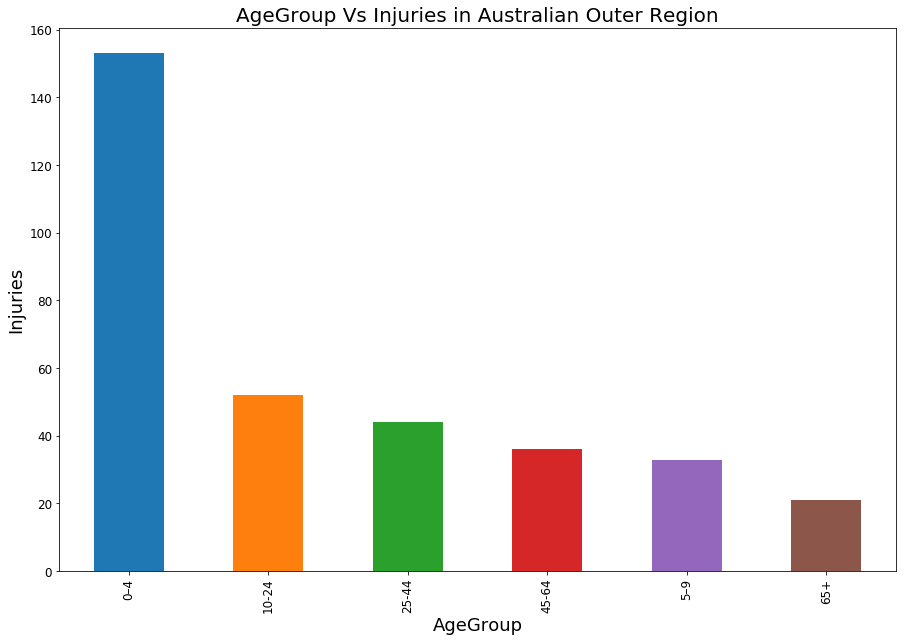

In [31]:
causeLocGrouped = causeLocOuterRegion.groupby(['AgeGroup'])['Injuries'].agg('sum').reset_index()
causeLocGrouped = causeLocGrouped.sort_values(by=['Injuries'],ascending =False)
causeLocGrouped.plot.bar(x='AgeGroup',y='Injuries',figsize=(15, 10),fontsize=12,legend=None)
plt.ylabel('Injuries',fontsize=18)
plt.xlabel('AgeGroup',fontsize=18)
plt.title('AgeGroup Vs Injuries in Australian Outer Region',fontsize=20)
plt.show()

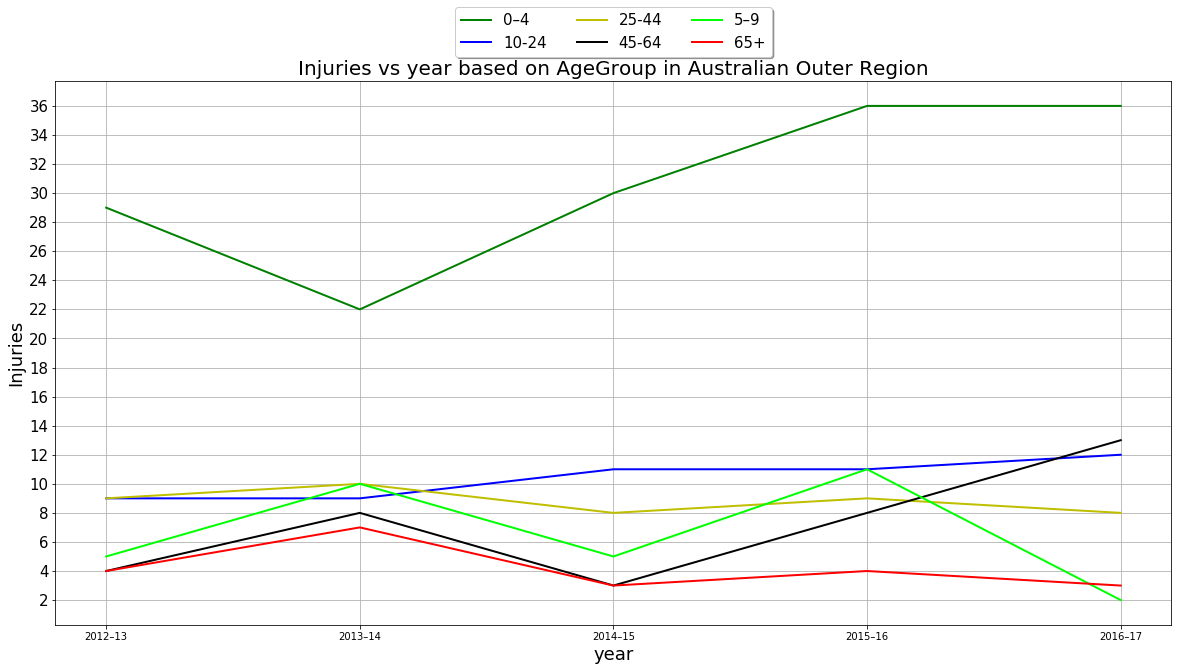

In [32]:
temp = causeLocOuterRegion[['AgeGroup','year','Injuries']].groupby(['AgeGroup','year']).agg('sum').reset_index()
groupedInfo = temp.groupby('AgeGroup')

yAxis, yAxisVariableNames = findAxisCordinatesAndNamesForTicks(temp['Injuries'])
colors = ['r','g','b','y','k','lime']

#Finding the x axis label
#ticks = findAxisCordinatesAndNamesForTicks(cause['year'],divisions = 10)
#xAxis = ticks[0]
#xAxisVariableNames =ticks[1]  

plt.figure(figsize = (20,10))

i=0
for ageGroup,info in groupedInfo:
    i+=1
    plt.plot(info.year,info.Injuries, label = ageGroup, linewidth = 2.0,color=colors[i%6])

#plt.xticks(xAxis, xAxisVariableNames, rotation = 45, fontsize = 15)
plt.yticks(yAxis, yAxisVariableNames, fontsize = 15)

plt.ylabel('Injuries', fontsize=18)
plt.xlabel('year', fontsize=18)
plt.title('Injuries vs year based on AgeGroup in Australian Outer Region', fontsize=20)
plt.legend(loc= 'upper center', ncol=3, fancybox = True, shadow = True, bbox_to_anchor = (0.5, 1.15), fontsize = 15)

plt.grid()
plt.show()

There is a -60.0 % increase from base value and -69.7 % increase from 10 year average


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


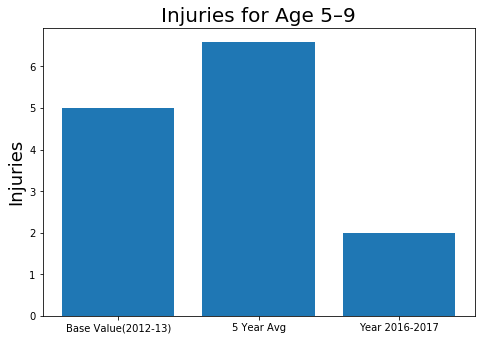

In [33]:
Injuries2012 = causeLocOuterRegion[(causeLocOuterRegion['year'] == '2012–13') & (cause['AgeGroup'] =='5–9')]['Injuries'].agg('sum')
InjuriesAvg = (causeLocOuterRegion[(causeLocOuterRegion['AgeGroup'] =='5–9')]['Injuries'].agg('sum'))/5
Injuries2017 = causeLocOuterRegion[(causeLocOuterRegion['year'] == '2016–17') & (cause['AgeGroup'] =='5–9')]['Injuries'].agg('sum')
BaseIncrease = (Injuries2017 - Injuries2012)*100/Injuries2012
AvgIncrease = (Injuries2017 - InjuriesAvg)*100/InjuriesAvg
print("There is a",round(BaseIncrease,2),"% increase from base value and",round(AvgIncrease,2),"% increase from 10 year average")

Injuries = [Injuries2012,InjuriesAvg,Injuries2017]
InjuriesColName = ['Base Value(2012-13)','5 Year Avg','Year 2016-2017']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(InjuriesColName,Injuries)
plt.ylabel('Injuries',fontsize=18)
plt.title('Injuries for Age 5–9',fontsize=20)
plt.show()

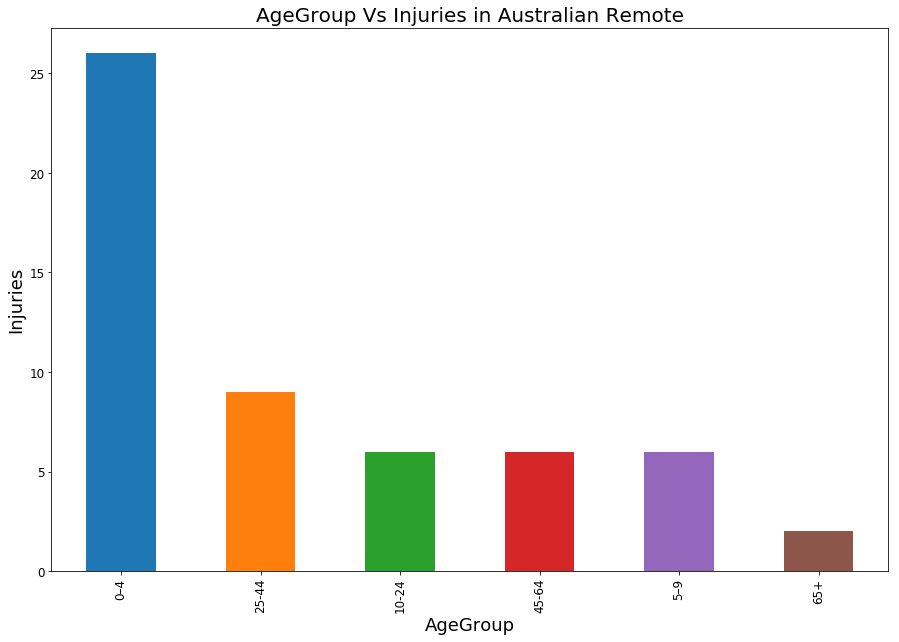

In [34]:
causeLocGrouped = causeLocRemote.groupby(['AgeGroup'])['Injuries'].agg('sum').reset_index()
causeLocGrouped = causeLocGrouped.sort_values(by=['Injuries'],ascending =False)
causeLocGrouped.plot.bar(x='AgeGroup',y='Injuries',figsize=(15, 10),fontsize=12,legend=None)
plt.ylabel('Injuries',fontsize=18)
plt.xlabel('AgeGroup',fontsize=18)
plt.title('AgeGroup Vs Injuries in Australian Remote',fontsize=20)
plt.show()

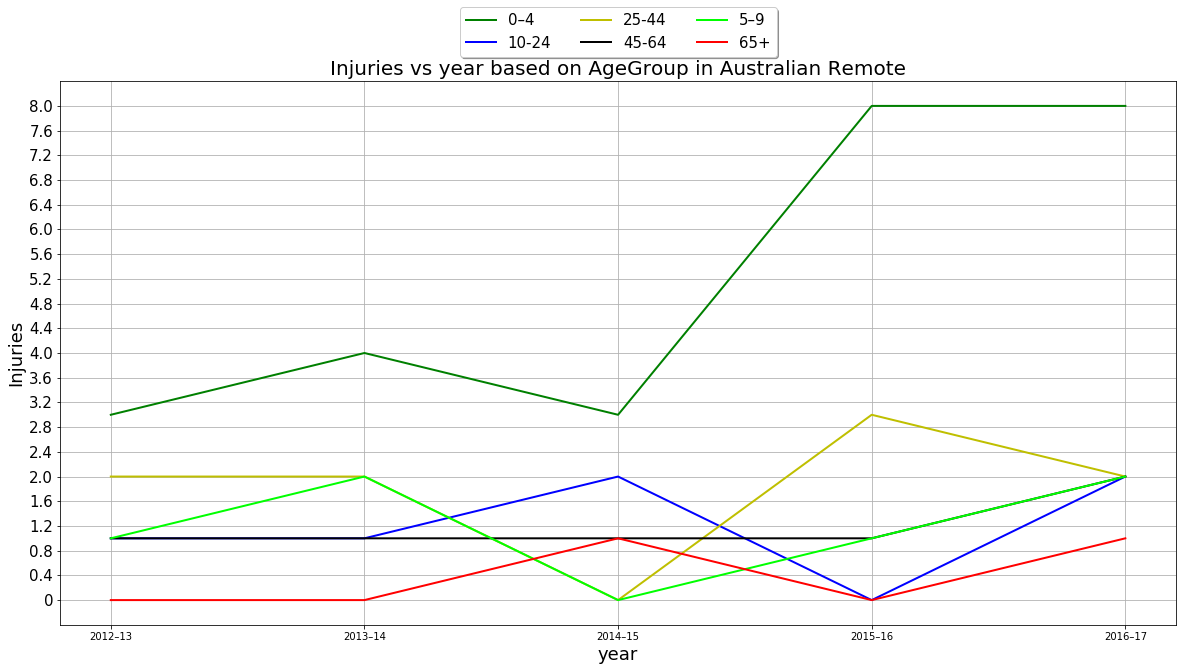

In [35]:
temp = causeLocRemote[['AgeGroup','year','Injuries']].groupby(['AgeGroup','year']).agg('sum').reset_index()
groupedInfo = temp.groupby('AgeGroup')

yAxis, yAxisVariableNames = findAxisCordinatesAndNamesForTicks(temp['Injuries'])
colors = ['r','g','b','y','k','lime']

#Finding the x axis label
#ticks = findAxisCordinatesAndNamesForTicks(cause['year'],divisions = 10)
#xAxis = ticks[0]
#xAxisVariableNames =ticks[1]  

plt.figure(figsize = (20,10))

i=0
for ageGroup,info in groupedInfo:
    i+=1
    plt.plot(info.year,info.Injuries, label = ageGroup, linewidth = 2.0,color=colors[i%6])

#plt.xticks(xAxis, xAxisVariableNames, rotation = 45, fontsize = 15)
plt.yticks(yAxis, yAxisVariableNames, fontsize = 15)

plt.ylabel('Injuries', fontsize=18)
plt.xlabel('year', fontsize=18)
plt.title('Injuries vs year based on AgeGroup in Australian Remote', fontsize=20)
plt.legend(loc= 'upper center', ncol=3, fancybox = True, shadow = True, bbox_to_anchor = (0.5, 1.15), fontsize = 15)

plt.grid()
plt.show()

There is a nan % increase from base value and -100.0 % increase from 10 year average


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in longlong_scalars
  after removing the cwd from sys.path.


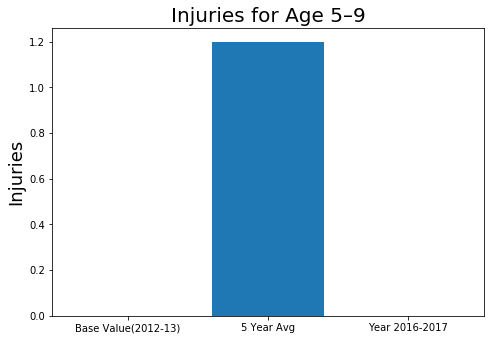

In [36]:
Injuries2012 = causeLocRemote[(causeLocRemote['year'] == '2012–13') & (cause['AgeGroup'] =='5–9')]['Injuries'].agg('sum')
InjuriesAvg = (causeLocRemote[(causeLocRemote['AgeGroup'] =='5–9')]['Injuries'].agg('sum'))/5
Injuries2017 = causeLocRemote[(causeLocRemote['year'] == '2016–17') & (cause['AgeGroup'] =='5–9')]['Injuries'].agg('sum')
BaseIncrease = (Injuries2017 - Injuries2012)*100/Injuries2012
AvgIncrease = (Injuries2017 - InjuriesAvg)*100/InjuriesAvg
print("There is a",round(BaseIncrease,2),"% increase from base value and",round(AvgIncrease,2),"% increase from 10 year average")

Injuries = [Injuries2012,InjuriesAvg,Injuries2017]
InjuriesColName = ['Base Value(2012-13)','5 Year Avg','Year 2016-2017']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(InjuriesColName,Injuries)
plt.ylabel('Injuries',fontsize=18)
plt.title('Injuries for Age 5–9',fontsize=20)
plt.show()

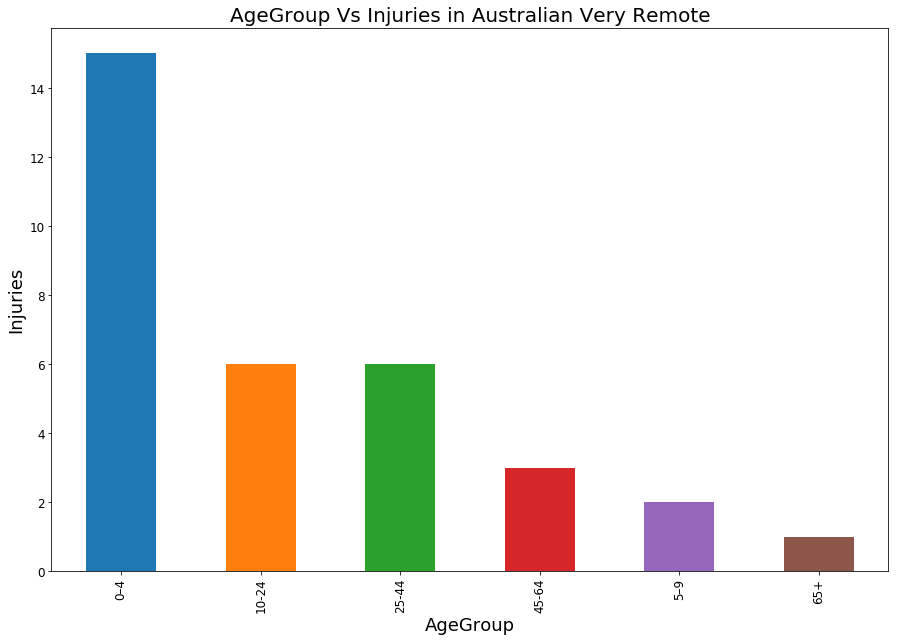

In [37]:
causeLocGrouped = causeLocVeryRemote.groupby(['AgeGroup'])['Injuries'].agg('sum').reset_index()
causeLocGrouped = causeLocGrouped.sort_values(by=['Injuries'],ascending =False)
causeLocGrouped.plot.bar(x='AgeGroup',y='Injuries',figsize=(15, 10),fontsize=12,legend=None)
plt.ylabel('Injuries',fontsize=18)
plt.xlabel('AgeGroup',fontsize=18)
plt.title('AgeGroup Vs Injuries in Australian Very Remote',fontsize=20)
plt.show()

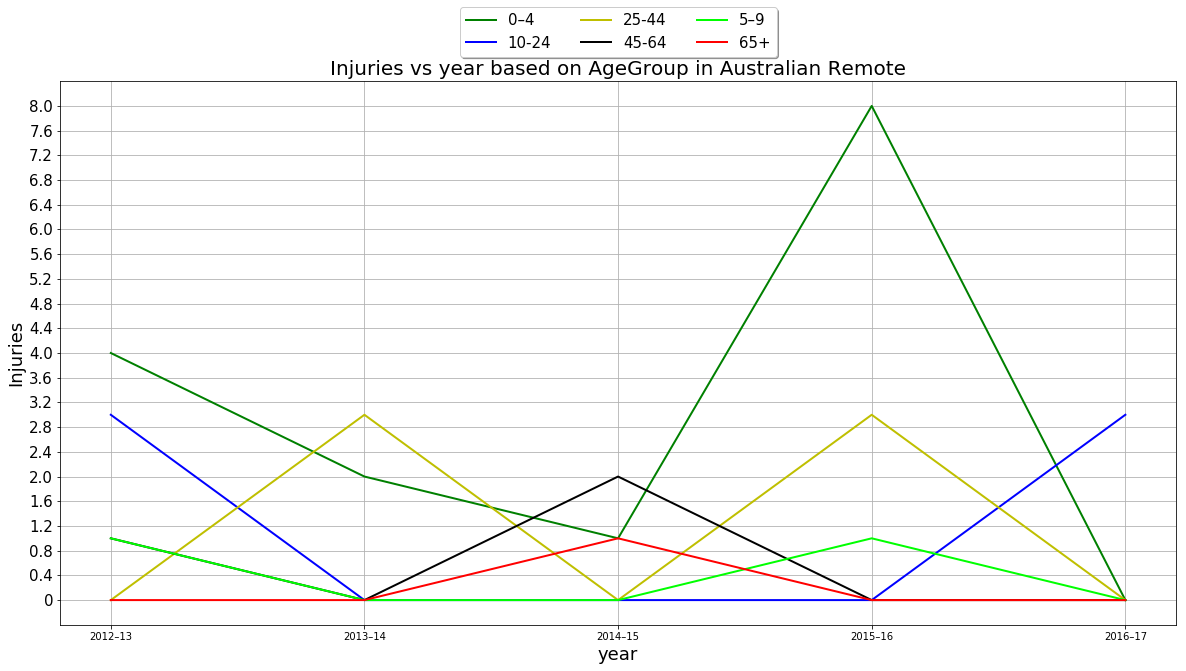

In [38]:
temp = causeLocVeryRemote[['AgeGroup','year','Injuries']].groupby(['AgeGroup','year']).agg('sum').reset_index()
groupedInfo = temp.groupby('AgeGroup')

yAxis, yAxisVariableNames = findAxisCordinatesAndNamesForTicks(temp['Injuries'])
colors = ['r','g','b','y','k','lime']

#Finding the x axis label
#ticks = findAxisCordinatesAndNamesForTicks(cause['year'],divisions = 10)
#xAxis = ticks[0]
#xAxisVariableNames =ticks[1]  

plt.figure(figsize = (20,10))

i=0
for ageGroup,info in groupedInfo:
    i+=1
    plt.plot(info.year,info.Injuries, label = ageGroup, linewidth = 2.0,color=colors[i%6])

#plt.xticks(xAxis, xAxisVariableNames, rotation = 45, fontsize = 15)
plt.yticks(yAxis, yAxisVariableNames, fontsize = 15)

plt.ylabel('Injuries', fontsize=18)
plt.xlabel('year', fontsize=18)
plt.title('Injuries vs year based on AgeGroup in Australian Remote', fontsize=20)
plt.legend(loc= 'upper center', ncol=3, fancybox = True, shadow = True, bbox_to_anchor = (0.5, 1.15), fontsize = 15)

plt.grid()
plt.show()

There is a -100.0 % increase from base value and -100.0 % increase from 10 year average


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


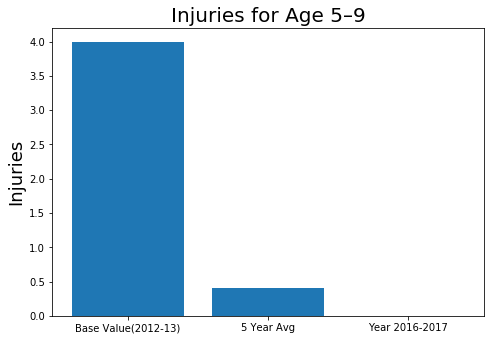

In [39]:
Injuries2012 = causeLocVeryRemote[(causeLocVeryRemote['year'] == '2012–13') & (cause['AgeGroup'] =='5–9')]['Injuries'].agg('sum')
InjuriesAvg = (causeLocVeryRemote[(causeLocVeryRemote['AgeGroup'] =='5–9')]['Injuries'].agg('sum'))/5
Injuries2017 = causeLocVeryRemote[(causeLocVeryRemote['year'] == '2016–17') & (cause['AgeGroup'] =='5–9')]['Injuries'].agg('sum')
BaseIncrease = (Injuries2017 - Injuries2012)*100/Injuries2012
AvgIncrease = (Injuries2017 - InjuriesAvg)*100/InjuriesAvg
print("There is a",round(BaseIncrease,2),"% increase from base value and",round(AvgIncrease,2),"% increase from 10 year average")

Injuries = [Injuries2012,InjuriesAvg,Injuries2017]
InjuriesColName = ['Base Value(2012-13)','5 Year Avg','Year 2016-2017']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(InjuriesColName,Injuries)
plt.ylabel('Injuries',fontsize=18)
plt.title('Injuries for Age 5–9',fontsize=20)
plt.show()